###Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

###Loading Dataset

In [3]:
wine = pd.read_csv('/content/drive/MyDrive/datasets/winequality-red.csv')

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.shape

(1599, 12)

In [8]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [10]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

###Data Analysis and visualization

In [11]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
wine[wine.columns[:]].corr()['quality'][:]

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

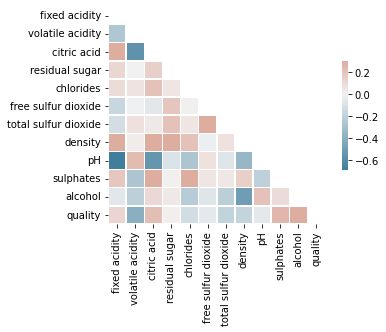

In [15]:
sns.heatmap(wine.corr(),
            mask=np.triu(np.ones_like(wine.corr(), dtype=bool)),
            cmap=sns.diverging_palette(230,20, as_cmap=True),
            vmax = .3,
            center = 0,
            square=True,
            linewidths=.5,
            cbar_kws={'shrink': .5}
            )

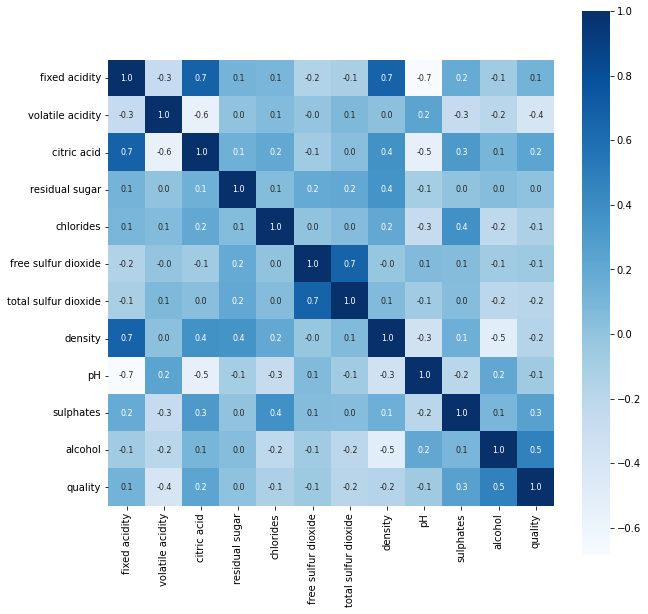

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(),
            cbar=True,
            square=True,
            fmt='.1f',
            annot=True,
            annot_kws={'size':8},
            cmap='Blues'
            )

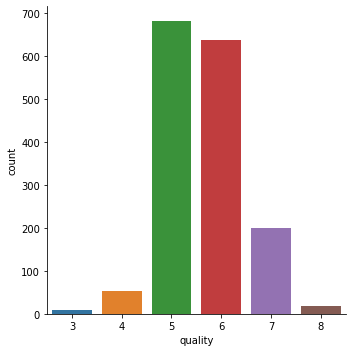

In [16]:
#number of samples by 'quality'
sns.catplot(x='quality', data = wine, kind = 'count')

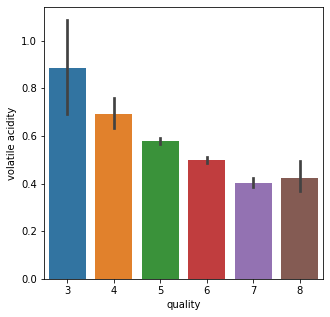

In [17]:
#volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=wine)

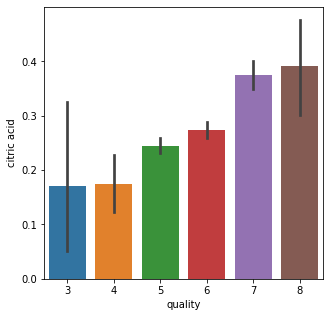

In [19]:
#citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=wine)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

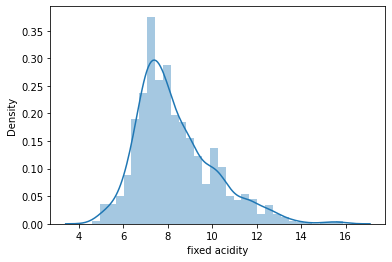

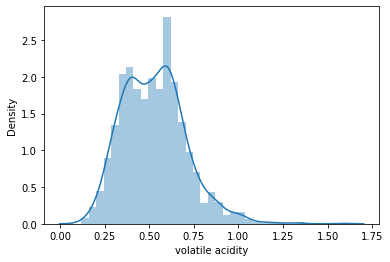

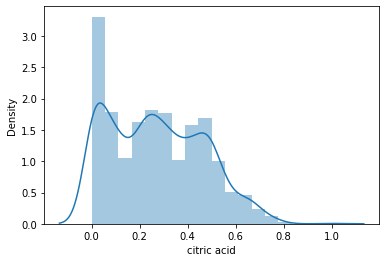

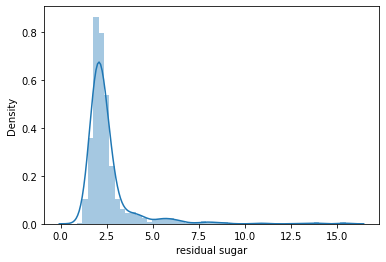

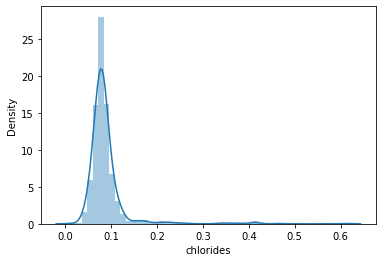

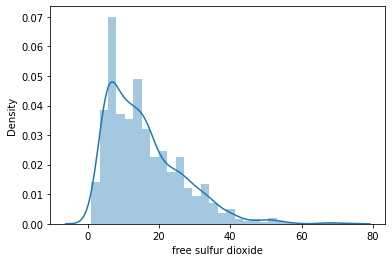

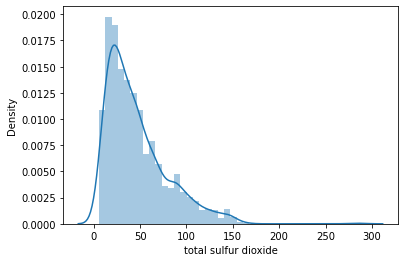

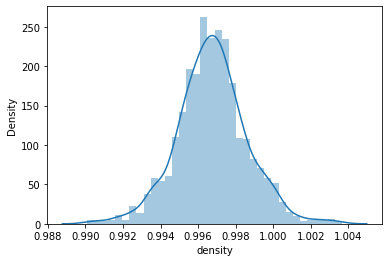

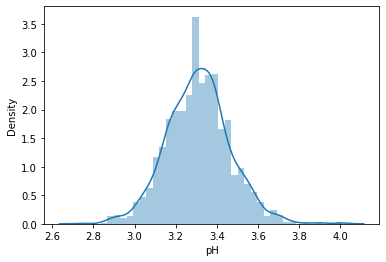

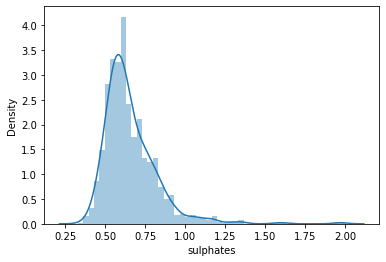

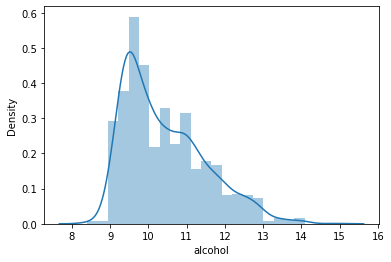

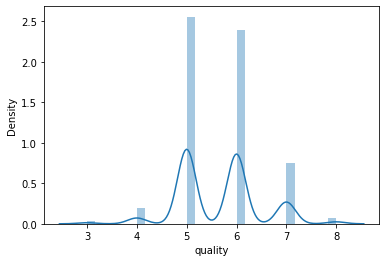

In [28]:
for i, col in enumerate(wine.columns):
    plt.figure(i)
    sns.distplot(wine[col])

In [29]:
plt.figure()
sns.pairplot(wine, hue = 'quality')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

###Preprocessing the data

In [32]:
X = wine.drop('quality', axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


####Label binarization

In [36]:
Y = wine['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [42]:
Y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

####Splitting the train and test data

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [44]:
print(Y.shape, y_test.shape, y_train.shape)

(1599,) (320,) (1279,)


In [45]:
print(X.shape, x_test.shape, x_train.shape)

(1599, 11) (320, 11) (1279, 11)


###Training the model

####Random Forest Classifier

In [46]:
model_random_forest = RandomForestClassifier()

In [47]:
model_random_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

###Evaluating the model

####Random Forest Classifier

In [48]:
random_forest_pred = model_random_forest.predict(x_test)
random_forest_acc = accuracy_score(random_forest_pred, y_test)
print('Random Forest Classifier: ', random_forest_acc)

Random Forest Classifier:  0.915625


###Building a predictive system

In [51]:
raw_data = (7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4) #bad quality wine

#changing raw data to numpy array
numpy_array_data = np.array(raw_data)

#reshape the data as we are predicting the label for only one instance
numpy_array_data_reshaped = numpy_array_data.reshape(1,-1)

random_forest_pred = model_random_forest.predict(numpy_array_data_reshaped)
if random_forest_pred[0] == 1:
  print('Good quality wine')
else:
  print('Bad quality wine')

Bad quality wine


###Acknowledgements

<p>Project 6. Wine Quality Prediction using Machine Learning with Python: https://www.youtube.com/watch?v=CBxJuwrGrc4</p>
<p>Dataset Red Wine quality from Kaggle: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009</p>
